In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [ ]:
def fact(N):
    if N == 0:
        return 1
    else:
        return N*fact(N-1)
def nCk(n,k):
    return int(fact(n) / (fact(k)*fact(n - k)))
def prod(array):
    if len(array) == 1:
        return array[0]
    else:
        return array[0]*prod(array[1:])

### 2.11

In [ ]:
%%time
U =[]
a = 0.5
for x in range(10**6):
    u = np.random.uniform()
    while u > a:
        u = np.random.uniform()
    U.append(u)

In [ ]:
%%time
V=[]
a=0.5
for x in range(10**6):
    v=a*np.random.uniform()
    V.append(v)

In [ ]:
n = 25
p = 0.2
k = [x for x in range(n+1)]
pmf = [round(nCk(25,x)*(p**x)*((1-p)**(n-x)),8) for x in range(n+1)]
cmf = [sum(pmf[:i+1]) for i in range(n+1)]
binom = {x:y for (x,y) in [(k[i],cmf[i]) for i in range(len(k))]}
binom

In [ ]:
%%time
B1 = []
for x in range(10**6):
    u = np.random.uniform()
    for i in range(n+1):
        if binom[i] > u:
            B1.append(i-1)
            break

In [ ]:
%%time
B2 = []
for x in range(10**6):
    B2.append(np.random.binomial(n=n,p=p))

In [ ]:
plt.hist(B1,bins=50,alpha=0.7)
plt.hist(B2,bins=50,alpha=0.7)
plt.show()

### 2.12

In [ ]:
alpha = 3
theta = 5
U = []
V = []
for run in range(10**5):
    u = 0
    for x in range(alpha):
        u += np.random.exponential(theta)
    V.append(np.random.gamma(shape=alpha,scale=theta))
    U.append(u)
plt.hist(U,bins=80,alpha=0.7,density=True)
plt.hist(V,bins=80,alpha=0.7,density=True)
plt.show()

In [ ]:
a = 2
b = 3
U = []
V = []
for run in range(10**5):
    ua = 0
    ub = 0
    for x in range(a):
        ua += np.random.exponential(1)
    for x in range(b):
        ub += np.random.exponential(1)
    V.append(np.random.beta(a,b))
    U.append(ua / (ua + ub))
plt.hist(U,bins=80,alpha=0.7,density=True)
plt.hist(V,bins=80,alpha=0.7,density=True)
plt.show()

### 2.13

In [ ]:
alpha = 2
pareto = []
for x in range(10**6):
    pareto.append(np.random.pareto(2))
plt.hist([x for x in pareto if x < 5],bins=70,alpha=0.7,density=True)
plt.show()

### 2.14

In [ ]:
a = []
b = []
c = []
for x in range(1000):
    a.append(np.random.negative_binomial(10,0.01))
    b.append(np.random.negative_binomial(10,0.1))
    c.append(np.random.negative_binomial(10,0.5))
plt.figure(0)
plt.hist(a,bins=70,alpha=0.7,density=True)
plt.figure(1)
plt.hist(b,bins=70,alpha=0.7,density=True)
plt.figure(2)
plt.hist(c,bins=70,alpha=0.7,density=True)
plt.show()

In [ ]:
a = []
b = []
c = []
for x in range(1000):
    a.append(np.random.logseries(0.001))
    b.append(np.random.logseries(0.01))
    c.append(np.random.logseries(0.9))
plt.figure(0)
plt.hist(a,bins=70,alpha=0.7,density=True)
plt.figure(1)
plt.hist(b,bins=70,alpha=0.7,density=True)
plt.figure(2)
plt.hist(c,bins=70,alpha=0.7,density=True)
plt.show()

## 2.15

In [ ]:
L = 0.25
P = []
for x in range(10**6):
    S = 0
    K = 0
    while S < 1:
        S += np.random.exponential(L)
        K += 1
    P.append(K)

In [ ]:
plt.hist(P,bins = 50, density=True)
plt.show()

In [ ]:
def f(x):
    return np.exp(-0.5*(x**2))*((np.sin(6*x)**2) + (3 * np.cos(x) **2) + (np.sin(4*x)**2) + 1) / 10
def normal(x):
    return (1/(np.sqrt(2*np.pi)))*np.exp(-0.5*(x**2))
F = [f(x/10000) for x in range(-40000, 40000)]
plt.plot([x/10000 for x in range(-40000, 40000)],F)
plt.show()

In [ ]:
n = [normal(x / 10000) for x in range(-40000,40000)]
plt.plot([x/10000 for x in range(-40000, 40000)],n)
plt.show()

In [ ]:
M = max([F[i] / n[i] for i in range(len(n))])
M

In [ ]:
weird_density_samples = []
for trial in range(100000):
    Y = np.random.normal()
    u = np.random.uniform()
    if u < f(Y) / (normal(Y) * M):
        weird_density_samples.append(Y)
def f(x):
    return np.exp(-0.5*(x**2))*((np.sin(6*x)**2) + (3 * np.cos(x) **2) + (np.sin(4*x)**2) + 1) / 10
def normal(x):
    return (1/(np.sqrt(2*np.pi)))*np.exp(-0.5*(x**2))
F = [f(x/10000) for x in range(-40000, 40000)]
plt.plot([x/10000 for x in range(-40000, 40000)],F)
plt.hist(weird_density_samples,bins = 100, density = True)
plt.show()

## 2.23

In [ ]:
def f(x,th):
    return (1/(2*np.pi**2)) * (1/(1+th**2))*prod([np.exp(-((y-th)**2)/2) for y in x])

In [ ]:
N = 1
norm = [st.norm.pdf(st.norm.rvs(3,1)) for x in range(N)]
L = prod(norm)
th = 3
f(norm,th) / (prod([st.cauchy.pdf(x) for x in norm]) * L)

In [ ]:
plt.hist(accept, bins=80)
plt.show()

In [10]:
T = 10**4
nu = 7
t = []
for n in range(T):
    y = st.chi2.rvs(nu)
    t.append(st.norm.rvs(0,scale = np.sqrt(nu/y)))

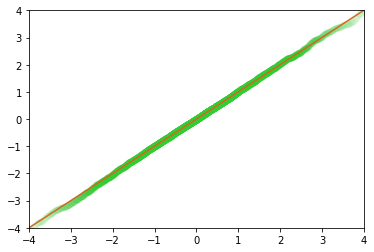

In [11]:
real_t = [st.t.ppf(x / (T+1), nu) for x in range(1,T+1)]
plt.scatter(sorted(real_t),sorted(t),alpha=0.05, c = "limegreen")
a = [x / 10000 for x in range(-40000,40000)]
plt.plot(a,a,c  = "chocolate")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

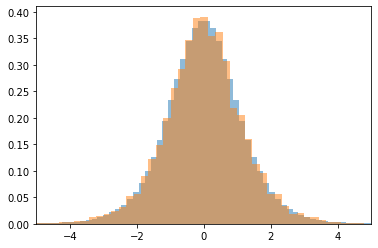

In [12]:
plt.hist(real_t,bins=80,density=True,alpha = 0.5)
plt.hist(t, bins=80,density=True, alpha = 0.5)
plt.xlim(-5,5)
plt.show()

In [13]:
print("p-val: ", st.kstest(rvs = t,cdf = "t",args = [nu])[1])

p-val:  0.9718445725686321


In [15]:
for nu in range(2,50):
    T = 10**4
    t = []
    for n in range(T):
        y = st.chi2.rvs(nu)
        t.append(st.norm.rvs(0,scale = np.sqrt(nu/y)))
    real_t = [st.t.ppf(x / (T+1), nu) for x in range(1,T+1)]
    p = st.kstest(rvs = t,cdf = "t",args = [nu])[1]
    print("p-val, nu: ", p,",", nu)

p-val, nu:  0.5883889267280601 , 2
p-val, nu:  0.698453119935978 , 3
p-val, nu:  0.9452524395589974 , 4
p-val, nu:  0.6251430716263531 , 5
p-val, nu:  0.6728573629222725 , 6
p-val, nu:  0.9946578607459684 , 7
p-val, nu:  0.8159755832285664 , 8
p-val, nu:  0.16689707902236667 , 9
p-val, nu:  0.04084237836543922 , 10
p-val, nu:  0.7673332000003 , 11
p-val, nu:  0.24385066074839162 , 12
p-val, nu:  0.512958543401731 , 13
p-val, nu:  0.9184531224560959 , 14
p-val, nu:  0.7813709409366931 , 15
p-val, nu:  0.3431959967183434 , 16
p-val, nu:  0.6181740475829773 , 17
p-val, nu:  0.772709396738069 , 18
p-val, nu:  0.4779179201772437 , 19
p-val, nu:  0.8748345024558206 , 20
p-val, nu:  0.7458802056708165 , 21
p-val, nu:  0.5586457751567804 , 22
p-val, nu:  0.1474230146579886 , 23
p-val, nu:  0.2524113315246009 , 24
p-val, nu:  0.07567252878299179 , 25
p-val, nu:  0.23032676704156455 , 26
p-val, nu:  0.5288687480232315 , 27
p-val, nu:  0.44076327494899015 , 28
p-val, nu:  0.5324640087697075 , 29
